In [17]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Reading and Understanding the dataset

In [2]:
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
student_data.shape

(25, 2)

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### In order to determine whether there is a linear relationship between the features of dataset we need to check the distribution of the datapoints.

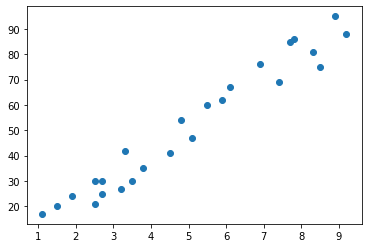

In [5]:
plt.scatter(student_data.Hours, student_data.Scores)
plt.show()

#### From the above plot we can see there is linear relationship between the two variables. So we can build a Regression model to this dataset.

#### In python we can build a Regression model using two different libraries
#### 1. Statmodels
#### 2. Sklearn
#### We will be buliding the model in both the cases.

### Model building using StatModels.

In [6]:
# Creating X and y
X = student_data["Hours"]
y = student_data["Scores"]

In [9]:
# Dividing the data into Training and Test sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70, random_state=100)

In [10]:
#Lets check the shape of each set.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17,)
(17,)
(8,)
(8,)


In [11]:
#As we know linear model need a constant in it equation.

In [12]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,Hours
6,1.0,9.2
12,1.0,4.5
4,1.0,3.5
24,1.0,7.8
0,1.0,2.5


In [14]:
# Lets fit the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    1.495142
Hours    9.871714
dtype: float64

In [18]:
# Now lets check the summary details of model.
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.15e-11
Time:                        15:01:59   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As we can see we got 0.95 of R-Square which means that the 95% of variance of Scores is explained by Hours. And they also got significant P values.


In [19]:
# lets predict the y.
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

6     92.314915
12    45.917857
4     36.046143
24    78.494515
0     26.174428
1     51.840886
20    28.148771
14    12.354028
17    20.251400
18    61.712600
2     33.084628
10    77.507343
16    26.174428
15    89.353401
7     55.789571
3     85.404715
8     83.430372
dtype: float64

#### Lets Visualize the model building.

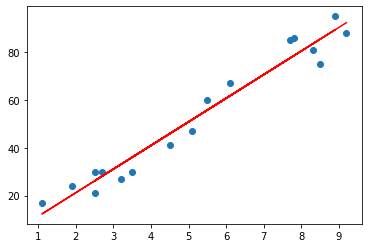

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

#### Residual Analysis

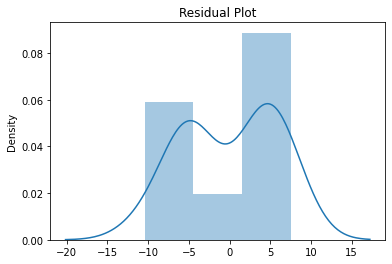

In [24]:
residual = y_train - y_train_pred
plt.figure()
sns.distplot(residual)
plt.title("Residual Plot")
plt.show()

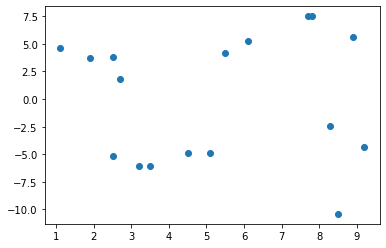

In [25]:
#pattern of residuals
plt.scatter(X_train, residual)
plt.show()

#### Lets predict and evaluate the model on test set.

In [26]:
X_test_sm = sm.add_constant(X_test)

In [27]:
y_test_pred = lr_model.predict(X_test_sm)

In [28]:
r2 = r2_score(y_true = y_test, y_pred =y_test_pred)
r2

0.9309458862687437

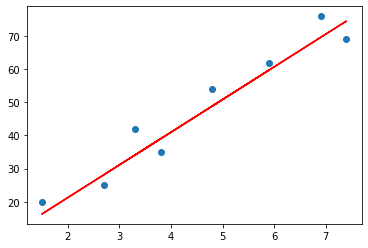

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

#### From the above model evaluation we can see that R-Sqaure is 93% and the Model fit perfectly in the test dataset.

#### The best fit line model for the above dataset is 
#### Score = 9.871714 * Hour + 1.495142

### Model building using SKLearn

#### Smilarly spliting data into training and test

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70, random_state=100)

In [31]:
# In this lets reshape the train set into (n,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)
X_train_lm.shape

(17, 1)

In [32]:
# Creating a model Fucntion
lm = LinearRegression()

In [34]:
# Fitting the Model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [35]:
# Analysing Coefficent
lm.coef_

array([9.87171443])

In [36]:
# Analysing Intercept
lm.intercept_

1.495142109236383

In [41]:
#Making Predictions
y_train_pred_lm = lm.predict(X_train_lm)
y_test_pred_lm = lm.predict(X_test_lm)

In [42]:
# Evalating the model using evalation metrics.
print(r2_score(y_true = y_train, y_pred =y_train_pred_lm))
print(r2_score(y_true = y_test, y_pred = y_test_pred_lm))

0.9570735354094693
0.9309458862687437


#### From the above model we can see the R-Square for train and test data set is 95% and 93%. Our model is predicting good in this dataset.

#### By looking at the Coefficent and Intercept of the model.
#### Score = 9.871714 * Hour + 1.495142

#### Predicting the unknown values.

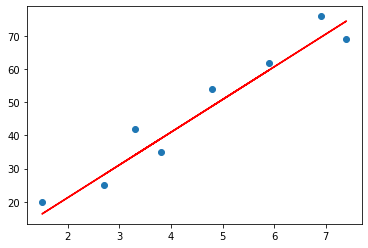

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred_lm, 'r')
plt.show()

In [39]:
hour = 9.25
score = 9.871714 * hour + 1.495142
score

92.8084965

#### If a student studies 9.25 hours a day he scores 92.8 % of score.